# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw = sinasc_raw.drop_duplicates()
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [3]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

In [4]:
sinasc_raw.dtypes

ORIGEM          int64
CODESTAB      float64
CODMUNNASC      int64
LOCNASC         int64
IDADEMAE        int64
               ...   
munResUf       object
munResLat     float64
munResLon     float64
munResAlt     float64
munResArea    float64
Length: 69, dtype: object

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [5]:
sinasc_1 = sinasc_raw[['IDADEMAE', 'IDADEPAI', 'ESCMAE', 'munResLat']]
sinasc_1
latitude = pd.cut(sinasc_raw['munResLat'], [-13.00000, -10.50000, 0])
sinasc_1 = sinasc_raw[['QTDFILVIVO', 'QTDFILMORT', 'ESCMAE']]
sinasc_1.groupby([latitude, 'ESCMAE']).aggregate([('Soma', sum), ('Média', np.mean), ('Mediana', np.median), ('Mínimo', min), 
                                              ('Máximo', max), ('Desvio Padrão', np.std), ("Variancia", np.var)])

QTDFILVIVO                                  \
                                     Soma     Média Mediana Mínimo Máximo   
munResLat      ESCMAE                                                       
(-13.0, -10.5] 1 a 3 anos           345.0  2.331081     2.0    0.0    8.0   
               12 anos ou mais     1760.0  0.659918     1.0    0.0    7.0   
               4 a 7 anos          2805.0  1.595563     1.0    0.0   30.0   
               8 a 11 anos         6954.0  0.914278     1.0    0.0   14.0   
               Nenhuma               70.0  4.117647     4.0    0.0   12.0   
(-10.5, 0.0]   1 a 3 anos           833.0  2.414493     2.0    0.0   12.0   
               12 anos ou mais     2016.0  0.791519     1.0    0.0    7.0   
               4 a 7 anos          4104.0  1.525084     1.0    0.0   10.0   
               8 a 11 anos         6963.0  1.022317     1.0    0.0    8.0   
               Nenhuma               77.0  3.347826     2.0    0.0   12.0   

                                                        QTDFILMORT            \
                               Desvio Padrão  Variancia       Soma     Média   
munResLat      ESCMAE                                                          
(-13.0, -10.5] 1 a 3 anos           1.687846   2.848823       59.0  0.401361   
               12 anos ou mais      0.765572   0.586101      620.0  0.232908   
               4 a 7 anos           1.602759   2.568836      527.0  0.301660   
               8 a 11 anos          1.011447   1.023026     1719.0  0.227051   
               Nenhuma              3.179669  10.110294        5.0  0.294118   
(-10.5, 0.0]   1 a 3 anos           1.934785   3.743394      152.0  0.460606   
               12 anos ou mais      0.828190   0.685898      687.0  0.277688   
               4 a 7 anos           1.441686   2.078460      837.0  0.326316   
               8 a 11 anos          1.038510   1.078503     1797.0  0.273599   
               Nenhuma              3.511134  12.328063       16.0  0.842105   

                                                                              
                               Mediana Mínimo Máximo Desvio Padrão Variancia  
munResLat      ESCMAE                                                         
(-13.0, -10.5] 1 a 3 anos          0.0    0.0    3.0      0.658557  0.433697  
               12 anos ou mais     0.0    0.0   28.0      0.750697  0.563547  
               4 a 7 anos          0.0    0.0    6.0      0.618549  0.382603  
               8 a 11 anos         0.0    0.0    7.0      0.531032  0.281995  
               Nenhuma             0.0    0.0    2.0      0.685994  0.470588  
(-10.5, 0.0]   1 a 3 anos          0.0    0.0    4.0      0.779658  0.607866  
               12 anos ou mais     0.0    0.0    6.0      0.615289  0.378580  
               4 a 7 anos          0.0    0.0    8.0      0.665589  0.443008  
               8 a 11 anos         0.0    0.0    9.0      0.599139  0.358968  
               Nenhuma             0.0    0.0    9.0      2.061907  4.251462

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [6]:
sinasc_2 = sinasc_raw[['IDADEMAE', 'IDADEPAI', 'ESCMAE', 'PESO', 'munResArea']]
sinasc_2
area = pd.cut(sinasc_raw['munResArea'], [0, 3000, 999999])
sinasc_2 = sinasc_raw[['IDADEMAE', 'IDADEPAI', 'ESCMAE']]
sinasc_2.groupby([area, 'ESCMAE']).aggregate([('Soma', sum), ('Média', np.mean), ('Mediana', np.median), ('Mínimo', min), 
                                              ('Máximo', max), ('Desvio Padrão', np.std), ("Variancia", np.var)])


IDADEMAE                                   \
                                   Soma      Média Mediana Mínimo Máximo   
munResArea     ESCMAE                                                      
(0, 3000]      1 a 3 anos          2388  29.850000    30.5     12     44   
               12 anos ou mais    31915  29.306703    29.0     16     51   
               4 a 7 anos         21315  25.680723    25.0     11     47   
               8 a 11 anos        80273  25.346700    24.0     13     53   
               Nenhuma              250  35.714286    35.0     28     52   
(3000, 999999] 1 a 3 anos         12282  28.169725    28.0     12     45   
               12 anos ou mais   138489  29.604318    30.0     17     47   
               4 a 7 anos         95802  24.377099    23.5     12     46   
               8 a 11 anos       312879  25.100602    24.0     12     53   
               Nenhuma             1013  30.696970    31.0     14     42   

                                                        IDADEPAI             \
                               Desvio Padrão  Variancia     Soma      Média   
munResArea     ESCMAE                                                         
(0, 3000]      1 a 3 anos           7.466550  55.749367    726.0  38.210526   
               12 anos ou mais      5.435582  29.545552  22880.0  32.873563   
               4 a 7 anos           6.854545  46.984791  10088.0  31.623824   
               8 a 11 anos          6.029966  36.360494  43581.0  30.035148   
               Nenhuma              7.653197  58.571429     68.0  34.000000   
(3000, 999999] 1 a 3 anos           7.338364  53.851587   1708.0  32.226415   
               12 anos ou mais      5.348105  28.602222  51634.0  32.992971   
               4 a 7 anos           6.782314  45.999781  19715.0  30.901254   
               8 a 11 anos          6.054522  36.657240  83926.0  30.027191   
               Nenhuma              8.662003  75.030303    163.0  40.750000   

                                                                               
                               Mediana Mínimo Máximo Desvio Padrão  Variancia  
munResArea     ESCMAE                                                          
(0, 3000]      1 a 3 anos         38.0   23.0   55.0      9.863394  97.286550  
               12 anos ou mais    32.0   18.0   62.0      6.818181  46.487588  
               4 a 7 anos         31.0   16.0   67.0      8.559606  73.266852  
               8 a 11 anos        29.0   16.0   69.0      7.611117  57.929109  
               Nenhuma            34.0   30.0   38.0      5.656854  32.000000  
(3000, 999999] 1 a 3 anos         32.0   17.0   60.0      8.552196  73.140058  
               12 anos ou mais    32.0   17.0   65.0      6.966440  48.531280  
               4 a 7 anos         30.0   16.0   86.0      8.791567  77.291647  
               8 a 11 anos        29.0   15.0   70.0      7.810019  60.996397  
               Nenhuma            41.0   29.0   52.0      9.535023  90.916667

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [7]:
sinasc_3 = sinasc_raw[['IDADEMAE', 'IDADEPAI', 'ESCMAE', 'PESO', 'munResAlt']].copy()
area = pd.cut(sinasc_raw['munResAlt'], [0, 340, 600])

sinasc_3.pivot_table(values=['IDADEMAE', 'IDADEPAI'],
                     index=[area, 'ESCMAE'],
                     aggfunc=[sum, np.mean, np.median, min, max, np.std, np.var],
                     margins=True,
                     margins_name='Total',
                     dropna=True)

sum                 mean              median  \
                           IDADEMAE  IDADEPAI   IDADEMAE   IDADEPAI IDADEMAE   
munResAlt  ESCMAE                                                              
(0, 340]   1 a 3 anos         14211    2350.0  28.365269  34.057971     28.0   
           12 anos ou mais   153840   68896.0  29.567557  32.901624     29.0   
           4 a 7 anos        112656   28730.0  24.592010  31.228261     24.0   
           8 a 11 anos       363275  123523.0  25.147100  29.988589     24.0   
           Nenhuma             1181     231.0  31.078947  38.500000     31.5   
(340, 600] 1 a 3 anos           459      84.0  30.600000  28.000000     30.0   
           12 anos ou mais    16564    5618.0  29.368794  33.640719     29.0   
           4 a 7 anos          4461    1073.0  24.921788  29.000000     24.0   
           8 a 11 anos        29877    3984.0  25.191400  31.370079     25.0   
           Nenhuma               82       0.0  41.000000        NaN     41.0   
Total                        203507  234511.0  26.979584  31.089885     27.0   

                                         min               max           \
                           IDADEPAI IDADEMAE IDADEPAI IDADEMAE IDADEPAI   
munResAlt  ESCMAE                                                         
(0, 340]   1 a 3 anos          35.0       12     17.0       45     60.0   
           12 anos ou mais     32.0       16     17.0       51     65.0   
           4 a 7 anos          30.0       11     16.0       45     86.0   
           8 a 11 anos         29.0       12     15.0       53     70.0   
           Nenhuma             38.5       14     29.0       52     52.0   
(340, 600] 1 a 3 anos          23.0       22     23.0       43     38.0   
           12 anos ou mais     34.0       18     18.0       43     60.0   
           4 a 7 anos          29.0       14     18.0       47     47.0   
           8 a 11 anos         30.0       14     16.0       44     53.0   
           Nenhuma              NaN       41      NaN       41      NaN   
Total                          30.0       12     15.0       53     86.0   

                                 std                  var             
                            IDADEMAE  IDADEPAI   IDADEMAE   IDADEPAI  
munResAlt  ESCMAE                                                     
(0, 340]   1 a 3 anos       7.413792  9.235297  54.964311  85.290708  
           12 anos ou mais  5.378289  6.937911  28.925991  48.134608  
           4 a 7 anos       6.793017  8.755416  46.145080  76.657307  
           8 a 11 anos      6.040720  7.736124  36.490302  59.847611  
           Nenhuma          8.559432  8.549854  73.263869  73.100000  
(340, 600] 1 a 3 anos       5.766901  8.660254  33.257143  75.000000  
           12 anos ou mais  5.247564  6.671484  27.536929  44.508693  
           4 a 7 anos       7.299725  7.490735  53.285983  56.111111  
           8 a 11 anos      6.166573  7.834400  38.026626  61.377828  
           Nenhuma          0.000000       NaN   0.000000        NaN  
Total                       6.243659  7.769183  38.983277  60.360209

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


In [8]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

In [9]:
sinasc_4 = sinasc_raw[['IDADEMAE', 'DTNASC', 'munResNome']].copy()
sinasc_4 = sinasc_4.set_index('munResNome')
resultado = sinasc_4.groupby([imediatas, 'DTNASC'])[['IDADEMAE']].mean()
resultado.reset_index(inplace=True)

In [10]:
resultado['DTNASC'] = pd.to_datetime(resultado['DTNASC'], format='%Y-%m-%d', errors='ignore')
resultado

,munResNome,DTNASC,IDADEMAE
0,Ariquemes,2019-01-01,23.200000
1,Ariquemes,2019-01-02,26.166667
2,Ariquemes,2019-01-03,24.142857
3,Ariquemes,2019-01-04,24.666667
4,Ariquemes,2019-01-05,22.888889
...,...,...,...
2176,Vilhena,2019-12-27,27.000000
2177,Vilhena,2019-12-28,22.666667
2178,Vilhena,2019-12-29,24.250000
2179,Vilhena,2019-12-30,26.600000


In [11]:
resultado['DTNASC_mes'] = resultado['DTNASC'].dt.month
resultado

,munResNome,DTNASC,IDADEMAE,DTNASC_mes
0,Ariquemes,2019-01-01,23.200000,1
1,Ariquemes,2019-01-02,26.166667,1
2,Ariquemes,2019-01-03,24.142857,1
3,Ariquemes,2019-01-04,24.666667,1
4,Ariquemes,2019-01-05,22.888889,1
...,...,...,...,...
2176,Vilhena,2019-12-27,27.000000,12
2177,Vilhena,2019-12-28,22.666667,12
2178,Vilhena,2019-12-29,24.250000,12
2179,Vilhena,2019-12-30,26.600000,12


<Axes: xlabel='munResNome,DTNASC_mes'>

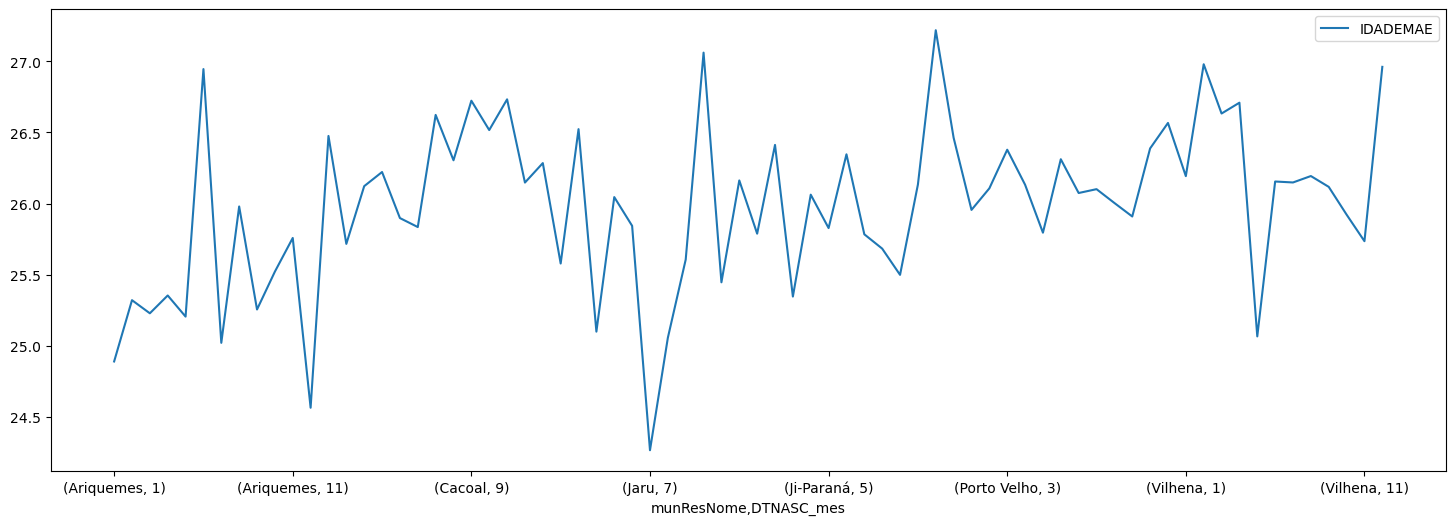

In [12]:
resultado.groupby(['munResNome', 'DTNASC_mes'])[['IDADEMAE']].mean().plot(figsize=[18, 6])

C:\Users\Xam_j\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


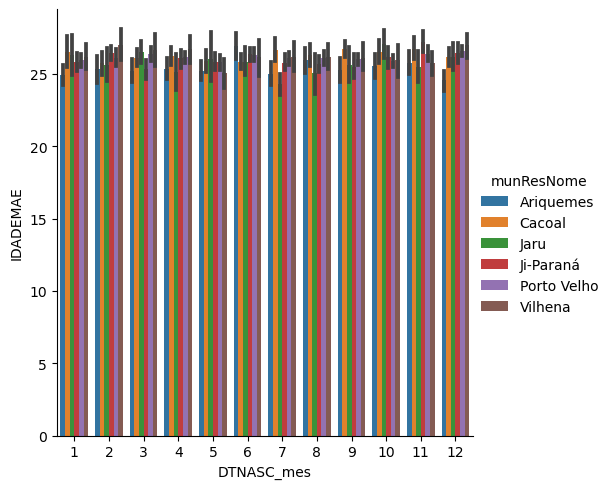

In [13]:
ax = sns.catplot(data=resultado, x='DTNASC_mes', y ='IDADEMAE', hue='munResNome', kind='bar')

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [14]:
sinasc_5 = sinasc_raw[['PARTO', 'PESO', 'QTDFILVIVO', 'QTDFILMORT', 'munResNome']].copy()
idh = {
    "Alta Floresta D'Oeste": 'IDH-M médio', 
    'Alto Alegre dos Parecis': 'IDH-M baixo',
    'Novo Horizonte do Oeste': 'IDH-M médio', 
    "São Felipe D'Oeste": 'IDH-M médio',
    'Cujubim': 'IDH-M médio', 
    'Alto Paraíso': 'IDH-M médio', 
    'Monte Negro': 'IDH-M médio', 
    'Jaru': 'IDH-M médio',
    'Rio Crespo': 'IDH-M médio', 
    'Cacaulândia': 'IDH-M médio', 
    'Itapuã do Oeste': 'IDH-M médio', 
    'Buritis': 'IDH-M médio', 
    'Vale do Anari': 'IDH-M baixo', 
    'Candeias do Jamari': 'IDH-M médio', 
    'Costa Marques': 'IDH-M médio', 
    'Campo Novo de Rondônia': 'IDH-M baixo', 
    "Machadinho D'Oeste": 'IDH-M baixo', 
    'Colorado do Oeste': 'IDH-M médio', 
    'Nova Mamoré': 'IDH-M baixo', 
    'Urupá': 'IDH-M médio', 
    'Ouro Preto do Oeste': 'IDH-M médio', 
    'Corumbiara': 'IDH-M médio', 
    'São Miguel do Guaporé': 'IDH-M médio', 
    'Governador Jorge Teixeira': 'IDH-M baixo', 
    "Santa Luzia D'Oeste": 'IDH-M médio', 
    'Mirante da Serra': 'IDH-M médio', 
    'Cerejeiras': 'IDH-M médio', 
    'Presidente Médici': 'IDH-M médio', 
    'Parecis': 'IDH-M médio', 
    "Espigão D'Oeste": 'IDH-M médio', 
    'São Francisco do Guaporé': 'IDH-M médio', 
    'Ministro Andreazza': 'IDH-M médio', 
    "Nova Brasilândia D'Oeste": 'IDH-M médio', 
    "Alvorada D'Oeste": 'IDH-M médio', 
    'Primavera de Rondônia': 'IDH-M médio', 
    'Seringueiras': 'IDH-M baixo', 
    'Castanheiras': 'IDH-M médio', 
    'Chupinguaia': 'IDH-M médio', 
    'Guajará-Mirim': 'IDH-M médio', 
    'Theobroma': 'IDH-M baixo', 
    'Nova União': 'IDH-M baixo', 
    'Teixeirópolis': 'IDH-M médio', 
    'Vale do Paraíso': 'IDH-M médio', 
    'Pimenteiras do Oeste': 'IDH-M médio', 
    'Cabixi': 'IDH-M médio',
    'Porto Velho': 'IDH-M alto',
    'Vilhena': 'IDH-M alto',
    'Cacoal': 'IDH-M alto',
    'Ji-Paraná': 'IDH-M alto',
    'Pimenta Bueno': 'IDH-M alto',
    'Ariquemes': 'IDH-M alto',
    'Rolim de Moura': 'IDH-M alto'

}
sinasc_5 = sinasc_5.set_index('munResNome')
#sinasc_5.groupby(idh).count()
sinasc_5.groupby([idh, 'PARTO']).count()

PESO  QTDFILVIVO  QTDFILMORT
munResNome  PARTO                                 
IDH-M alto  Cesáreo  10938       10254       10079
            Vaginal   5886        5412        5322
IDH-M baixo Cesáreo   1219        1152        1113
            Vaginal    604         581         569
IDH-M médio Cesáreo   5879        5676        5521
            Vaginal   2452        2334        2281

In [15]:
sinasc_5.groupby([idh]).count()

,PARTO,PESO,QTDFILVIVO,QTDFILMORT
munResNome,,,,
IDH-M alto,16824,16855,15695,15428
IDH-M baixo,1823,1826,1734,1684
IDH-M médio,8331,8346,8025,7817


### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [16]:
sinasc_52 = sinasc_raw[['ESCMAE', 'QTDFILVIVO', 'QTDFILMORT', 'munResNome']].copy()
ifdm = {
    "Alta Floresta D'Oeste": 'Desenvolvimento moderado', 
    'Alto Alegre dos Parecis': 'Desenvolvimento regular',
    'Novo Horizonte do Oeste': 'Desenvolvimento regular', 
    "São Felipe D'Oeste": 'Desenvolvimento moderado',
    'Cujubim': 'Desenvolvimento regular', 
    'Alto Paraíso': 'Desenvolvimento regular', 
    'Monte Negro': 'Desenvolvimento moderado', 
    'Jaru': 'Desenvolvimento moderado',
    'Rio Crespo': 'Desenvolvimento moderado', 
    'Cacaulândia': 'Desenvolvimento regular', 
    'Itapuã do Oeste': 'Desenvolvimento regular', 
    'Buritis': 'Desenvolvimento moderado', 
    'Vale do Anari': 'Desenvolvimento regular', 
    'Candeias do Jamari': 'Desenvolvimento moderado', 
    'Costa Marques': 'Desenvolvimento regular', 
    'Campo Novo de Rondônia': 'Desenvolvimento regular', 
    "Machadinho D'Oeste": 'Desenvolvimento regular', 
    'Colorado do Oeste': 'Desenvolvimento moderado', 
    'Nova Mamoré': 'Desenvolvimento regular', 
    'Urupá': 'Desenvolvimento moderado', 
    'Ouro Preto do Oeste': 'Desenvolvimento moderado', 
    'Corumbiara': 'Desenvolvimento regular', 
    'São Miguel do Guaporé': 'Desenvolvimento moderado', 
    'Governador Jorge Teixeira': 'Desenvolvimento regular', 
    "Santa Luzia D'Oeste": 'Desenvolvimento moderado', 
    'Mirante da Serra': 'Desenvolvimento regular', 
    'Cerejeiras': 'Desenvolvimento moderado', 
    'Presidente Médici': 'Desenvolvimento moderado', 
    'Parecis': 'Desenvolvimento regular', 
    "Espigão D'Oeste": 'Desenvolvimento regular', 
    'São Francisco do Guaporé': 'Desenvolvimento moderado', 
    'Ministro Andreazza': 'Desenvolvimento regular', 
    "Nova Brasilândia D'Oeste": 'Desenvolvimento regular', 
    "Alvorada D'Oeste": 'Desenvolvimento regular', 
    'Primavera de Rondônia': 'Desenvolvimento moderado', 
    'Seringueiras': 'Desenvolvimento regular',
    'Castanheiras': 'Desenvolvimento regular', 
    'Chupinguaia': 'Desenvolvimento moderado', 
    'Guajará-Mirim': 'Desenvolvimento regular', 
    'Theobroma': 'Desenvolvimento regular', 
    'Nova União': 'Desenvolvimento regular', 
    'Teixeirópolis': 'Desenvolvimento moderado', 
    'Vale do Paraíso': 'Desenvolvimento regular', 
    'Pimenteiras do Oeste': 'Desenvolvimento moderado', 
    'Cabixi': 'Desenvolvimento regular',
    'Porto Velho': 'Desenvolvimento moderado',
    'Vilhena': 'Desenvolvimento moderado',
    'Cacoal': 'Desenvolvimento moderado',
    'Ji-Paraná': 'Desenvolvimento moderado',
    'Pimenta Bueno': 'Desenvolvimento moderado',
    'Ariquemes': 'Desenvolvimento moderado',
    'Rolim de Moura': 'Desenvolvimento moderado'

}
sinasc_52 = sinasc_52.set_index('munResNome')
#sinasc_52.groupby(ifdm).median()
sinasc_52.groupby([ifdm, 'ESCMAE']).aggregate([('Soma', sum), ('Média', np.mean), ('Mediana', np.median), ('Mínimo', min), 
                                              ('Máximo', max), ('Desvio Padrão', np.std), ("Variancia", np.var)])

QTDFILVIVO                           \
                                               Soma     Média Mediana Mínimo   
munResNome               ESCMAE                                                
Desenvolvimento moderado 1 a 3 anos           887.0  2.359043     2.0    0.0   
                         12 anos ou mais     3378.0  0.715375     1.0    0.0   
                         4 a 7 anos          5228.0  1.522423     1.0    0.0   
                         8 a 11 anos        11167.0  0.953467     1.0    0.0   
                         Nenhuma              110.0  3.666667     2.5    0.0   
Desenvolvimento regular  1 a 3 anos           300.0  2.521008     2.0    0.0   
                         12 anos ou mais      517.0  0.782148     1.0    0.0   
                         4 a 7 anos          1779.0  1.654884     1.0    0.0   
                         8 a 11 anos         3056.0  1.005925     1.0    0.0   
                         Nenhuma               37.0  3.700000     3.5    0.0   

                                                                          \
                                         Máximo Desvio Padrão  Variancia   
munResNome               ESCMAE                                            
Desenvolvimento moderado 1 a 3 anos        12.0      1.875121   3.516078   
                         12 anos ou mais    7.0      0.796554   0.634498   
                         4 a 7 anos        30.0      1.474590   2.174417   
                         8 a 11 anos       10.0      1.002756   1.005520   
                         Nenhuma           12.0      3.304473  10.919540   
Desenvolvimento regular  1 a 3 anos        10.0      1.885937   3.556758   
                         12 anos ou mais    4.0      0.802108   0.643378   
                         4 a 7 anos        10.0      1.604510   2.574452   
                         8 a 11 anos       14.0      1.106435   1.224199   
                         Nenhuma           12.0      3.683296  13.566667   

                                         QTDFILMORT                           \
                                               Soma     Média Mediana Mínimo   
munResNome               ESCMAE                                                
Desenvolvimento moderado 1 a 3 anos           175.0  0.483425     0.0    0.0   
                         12 anos ou mais     1224.0  0.263509     0.0    0.0   
                         4 a 7 anos          1044.0  0.314458     0.0    0.0   
                         8 a 11 anos         2908.0  0.253420     0.0    0.0   
                         Nenhuma               14.0  0.538462     0.0    0.0   
Desenvolvimento regular  1 a 3 anos            37.0  0.316239     0.0    0.0   
                         12 anos ou mais      135.0  0.204545     0.0    0.0   
                         4 a 7 anos           346.0  0.328897     0.0    0.0   
                         8 a 11 anos          681.0  0.227303     0.0    0.0   
                         Nenhuma                7.0  0.700000     0.5    0.0   

                                                                         
                                         Máximo Desvio Padrão Variancia  
munResNome               ESCMAE                                          
Desenvolvimento moderado 1 a 3 anos         4.0      0.795417  0.632689  
                         12 anos ou mais   28.0      0.703667  0.495147  
                         4 a 7 anos         8.0      0.643344  0.413892  
                         8 a 11 anos        6.0      0.559907  0.313496  
                         Nenhuma            9.0      1.794007  3.218462  
Desenvolvimento regular  1 a 3 anos         2.0      0.535781  0.287062  
                         12 anos ou mais    6.0      0.560980  0.314699  
                         4 a 7 anos         6.0      0.660278  0.435967  
                         8 a 11 anos        9.0      0.571501  0.326613  
                         Nenhuma            2.0      0.823273  0.677778

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [17]:
sinasc_53 = sinasc_raw[['PARTO', 'IDADEMAE', 'IDADEPAI', 'PESO', 'QTDFILVIVO', 'QTDFILMORT', 'munResNome']].copy()
pib = {
    "Alta Floresta D'Oeste": 496000, 
    'Alto Alegre dos Parecis': 213410,
    'Novo Horizonte do Oeste': 129399, 
    "São Felipe D'Oeste": 72084,
    'Cujubim': 385000, 
    'Alto Paraíso': 358000, 
    'Monte Negro': 219152, 
    'Jaru': 1500890,
    'Rio Crespo': 76854, 
    'Cacaulândia': 116635, 
    'Itapuã do Oeste': 129351, 
    'Buritis': 726000, 
    'Vale do Anari': 105208, 
    'Candeias do Jamari': 548000, 
    'Costa Marques': 171878, 
    'Campo Novo de Rondônia': 208821, 
    "Machadinho D'Oeste": 633000, 
    'Colorado do Oeste': 335000, 
    'Nova Mamoré': 529000, 
    'Urupá': 172143, 
    'Ouro Preto do Oeste': 834000, 
    'Corumbiara': 188218, 
    'São Miguel do Guaporé': 616000, 
    'Governador Jorge Teixeira': 148027, 
    "Santa Luzia D'Oeste": 135934, 
    'Mirante da Serra': 163955, 
    'Cerejeiras': 507000, 
    'Presidente Médici': 428000, 
    'Parecis': 80759, 
    "Espigão D'Oeste": 625000, 
    'São Francisco do Guaporé': 353000, 
    'Ministro Andreazza': 174633, 
    "Nova Brasilândia D'Oeste": 360000, 
    "Alvorada D'Oeste": 204098, 
    'Primavera de Rondônia': 52908, 
    'Seringueiras': 169429, 
    'Castanheiras': 59779, 
    'Chupinguaia': 190331, 
    'Guajará-Mirim': 893000, 
    'Theobroma': 140601, 
    'Nova União': 92346, 
    'Teixeirópolis': 72089, 
    'Vale do Paraíso': 116742, 
    'Pimenteiras do Oeste': 76756, 
    'Cabixi': 113031,
    'Porto Velho': 17912070,
    'Vilhena': 2831175,
    'Cacoal': 2261644,
    'Ji-Paraná': 3783972,
    'Pimenta Bueno': 1164877,
    'Ariquemes': 2579830,
    'Rolim de Moura': 1283434

}


sinasc_53 = sinasc_53.set_index('munResNome')
#round(sinasc_53['PARTO'].groupby([pib,'munResNome']).count(), 2)
#round(sinasc_53['PARTO'].count(), 2)
#porcentagem = (round(sinasc_53['PARTO']['Porto Velho'].count(), 2) / round(sinasc_53['PARTO'].count(), 2))*100
#print(f'{round(porcentagem,2)}%')
sinasc_53['PARTO']['Porto Velho'].count()
round(sinasc_53.groupby([pib,'munResNome']).count(), 2)

,,PARTO,IDADEMAE,IDADEPAI,PESO,QTDFILVIVO,QTDFILMORT
munResNome,munResNome,,,,,,
52908.0,Primavera de Rondônia,43,43,36,43,43,43
59779.0,Castanheiras,32,32,28,32,32,32
72084.0,São Felipe D'Oeste,54,54,48,54,53,53
72089.0,Teixeirópolis,63,64,44,64,64,64
76756.0,Pimenteiras do Oeste,40,40,5,40,40,40
76854.0,Rio Crespo,50,50,1,50,47,47
80759.0,Parecis,44,44,38,44,43,42
92346.0,Nova União,104,104,70,104,103,103
105208.0,Vale do Anari,93,93,15,93,92,92


<Axes: xlabel='munResNome,munResNome'>

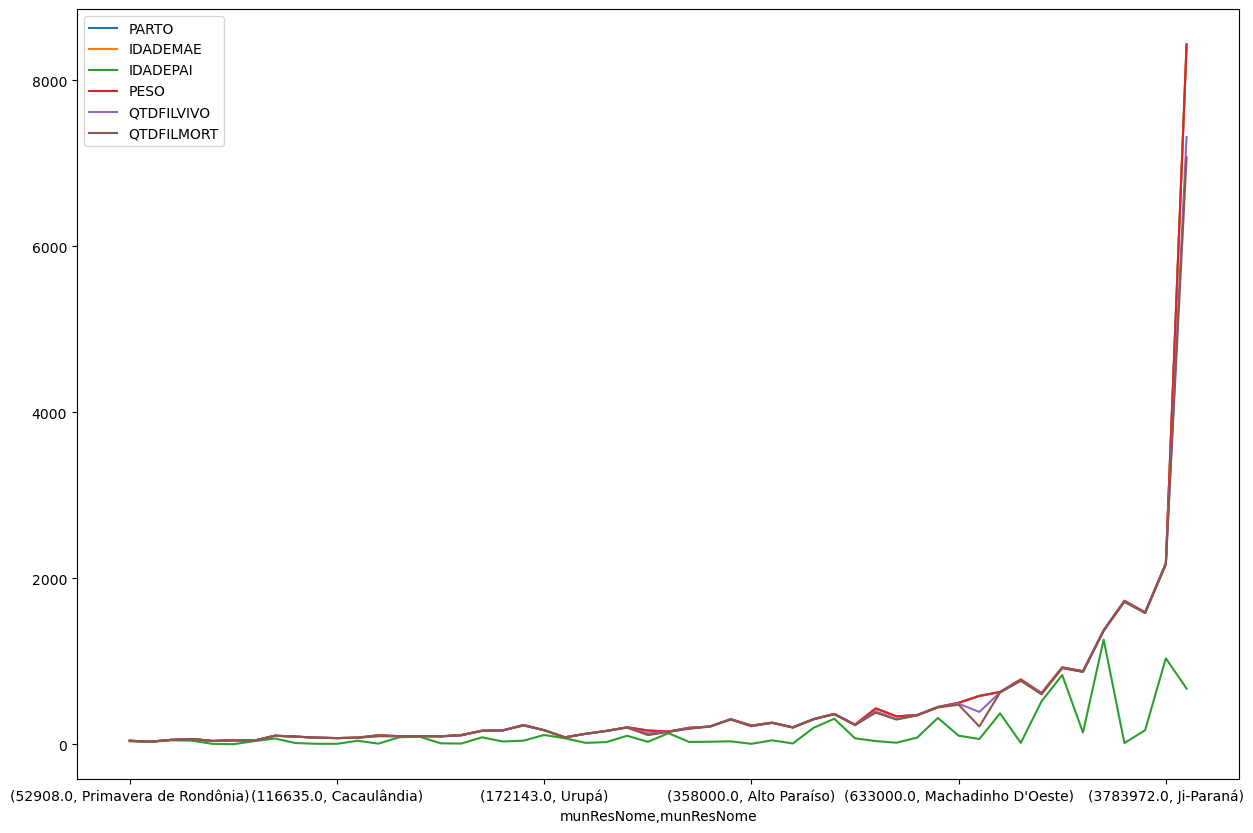

In [18]:
round(sinasc_53.groupby([pib,'munResNome']).count(), 2).plot(figsize=[15, 10])

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

## IDH-M

Um insight interessante é que há um favorecimento de **partos cesárea** independente do Índice de Desenvolvimento Humano (**IDH**) do município. No entanto, é evidente que os municípios com **IDH mais alto** registram aproximadamente **10 vezes** mais **partos naturais** do que os de **IDH baixo**. Além disso, nos municípios de **IDH mais alto**, ocorre o dobro de partos em comparação com os municípios de **IDH médio**, que, por sua vez, têm **8 vezes** mais partos do que os municípios de **IDH baixo**.


## IFDM

Um insight revelador é que a quantidade de filhos de mães com **baixa escolaridade**, **entre 1 e 3 anos** de educação ou menos, tende a ser maior, com um máximo de mais de **10 filhos vivos**. Por outro lado, para mães que concluíram **12 anos ou mais** de estudo, tanto em municípios de desenvolvimento moderado quanto em municípios de desenvolvimento regular, o número máximo de filhos é de **7**, mesmo em municípios com desenvolvimento menos avançado. Além disso, observou-se que mães com **12 anos ou mais** de escolaridade têm, em média, **1 filho**, enquanto aquelas com baixa escolaridade têm uma média de **2 filhos**. Nos municípios de desenvolvimento regular, a média é de **3,5 filhos** para mães sem nenhuma escolaridade.


### 5.3 PIB

Um insight revelador é que os municípios com os maiores PIBs tendem a apresentar as maiores taxas de natalidade. Isso sugere uma possível correlação entre o desenvolvimento econômico e o aumento da taxa de natalidade. O fenômeno pode ser resultado de diversos fatores, como melhores condições de vida, acesso a serviços de saúde, infraestrutura e oportunidades de emprego, que podem incentivar as famílias a terem mais filhos. Essa relação entre PIB e natalidade pode ser um aspecto importante a ser considerado ao analisar o crescimento populacional e os padrões socioeconômicos em diferentes regiões.